<a href="https://colab.research.google.com/github/fikisug/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Global Threshold**

*Code Berikut menunjukkan penggunaan dari library OpenCV cv.Threshold*

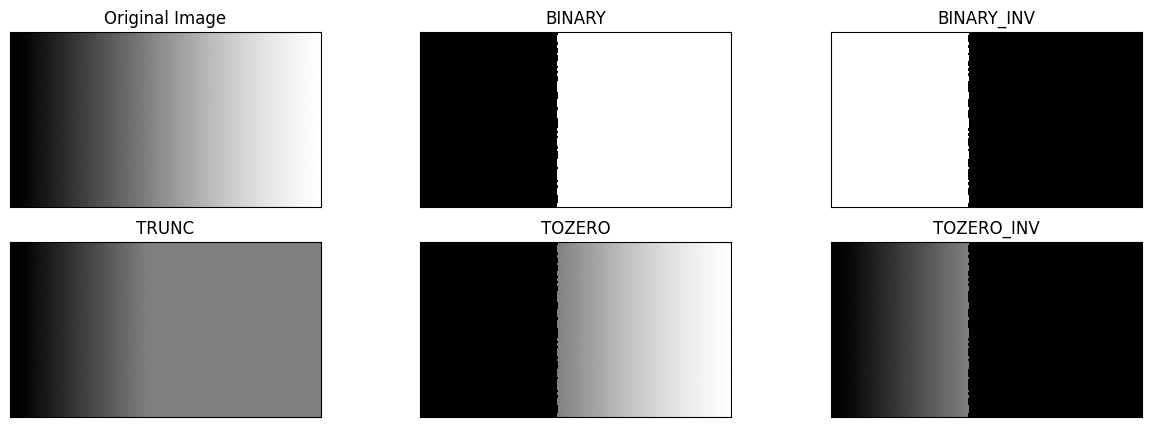

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

> # **🍑 Adaptive Threshold**

*Berikut adalah contoh code untuk Adaptive Threshold.*

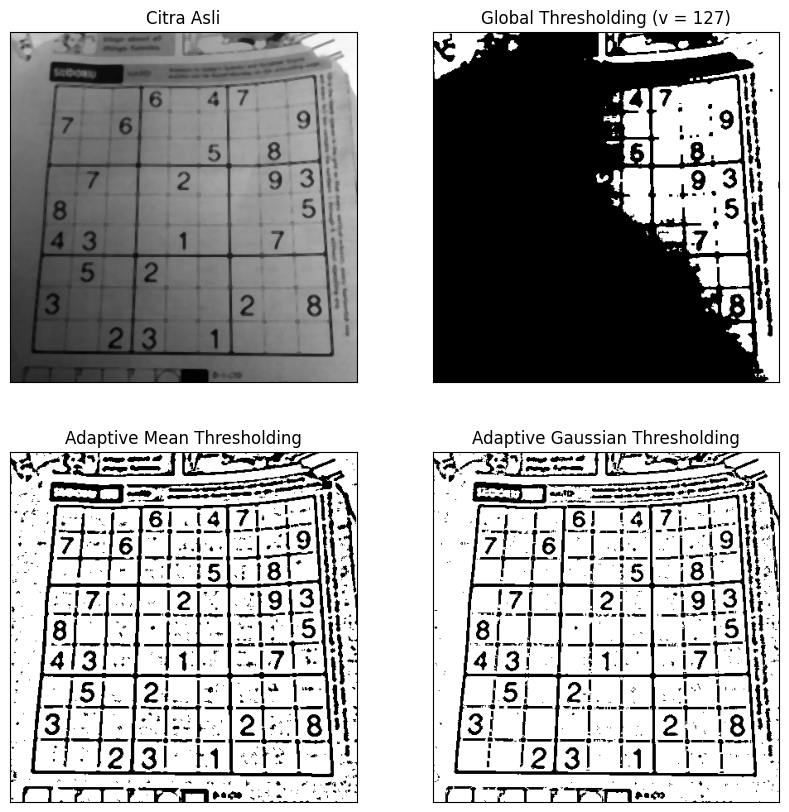

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

> # **🍑 Otsu’s Threshold**

*Berikut adalah code contoh penggunaan Otsu’s dengan library OpenCV.*

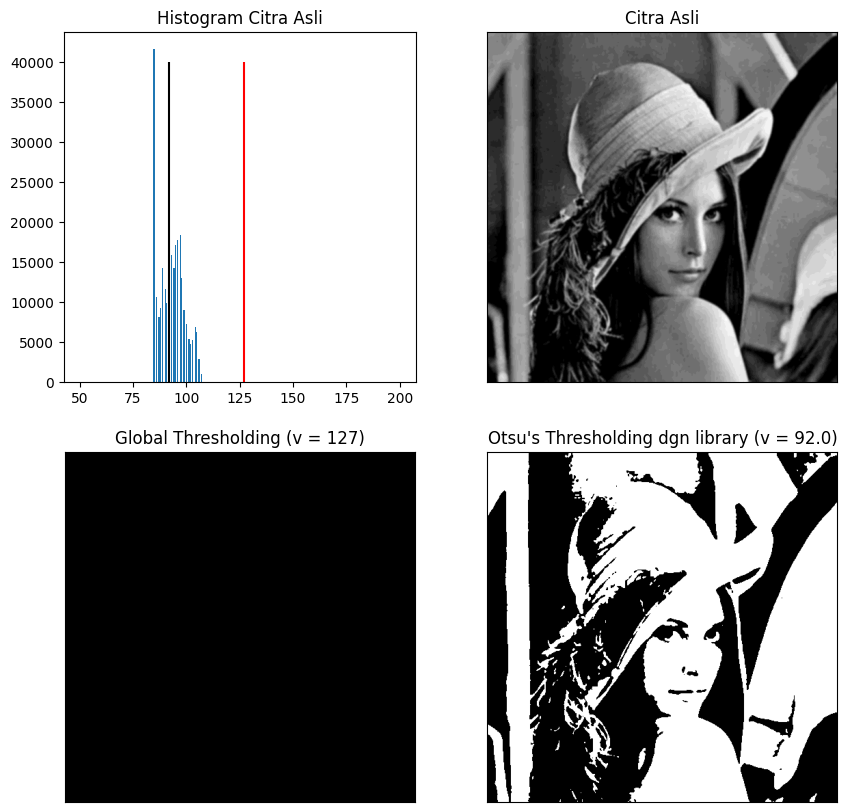

In [ ]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

*Code berikut akan menampilkan hasil dari threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.*

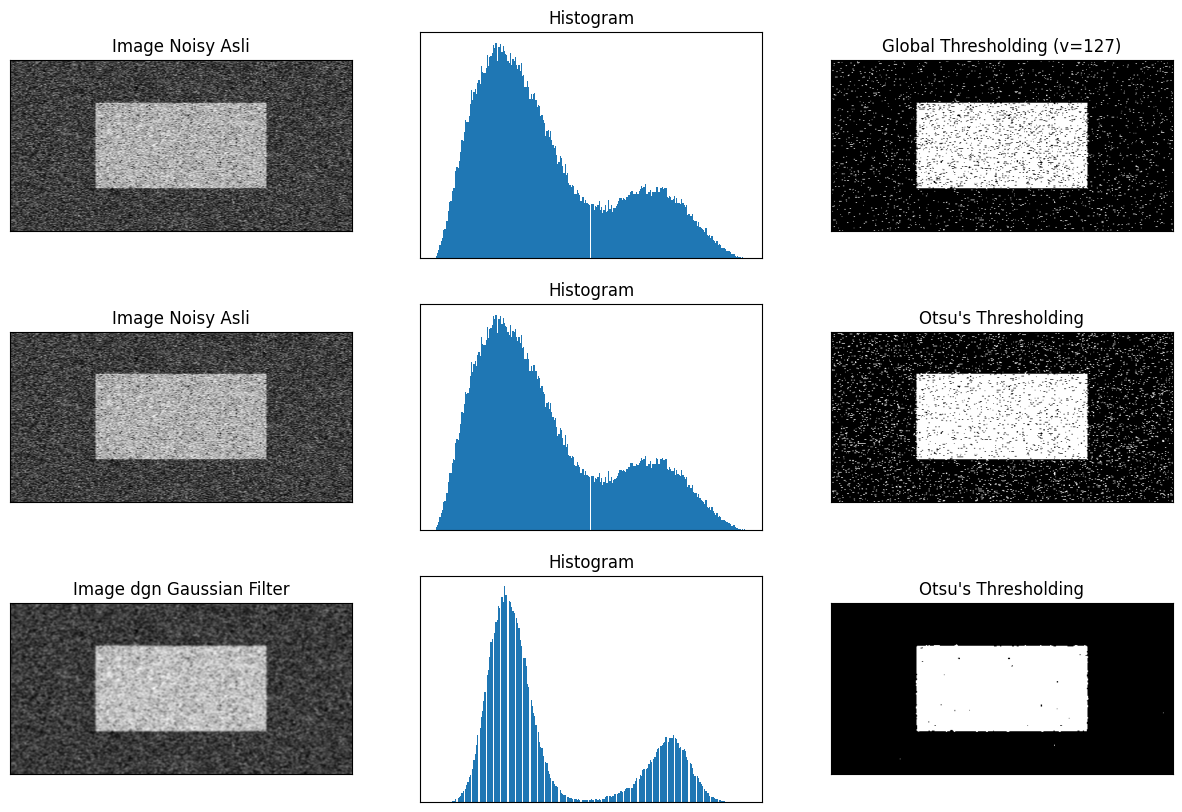

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

> # **🍑 Sementasi Citra menggunakan K-Means**

*Berikut adalah code untuk penggunaan K-Means pada segmentasi citra.*

(<Axes: >, <matplotlib.image.AxesImage at 0x7eeaaa26ac50>)

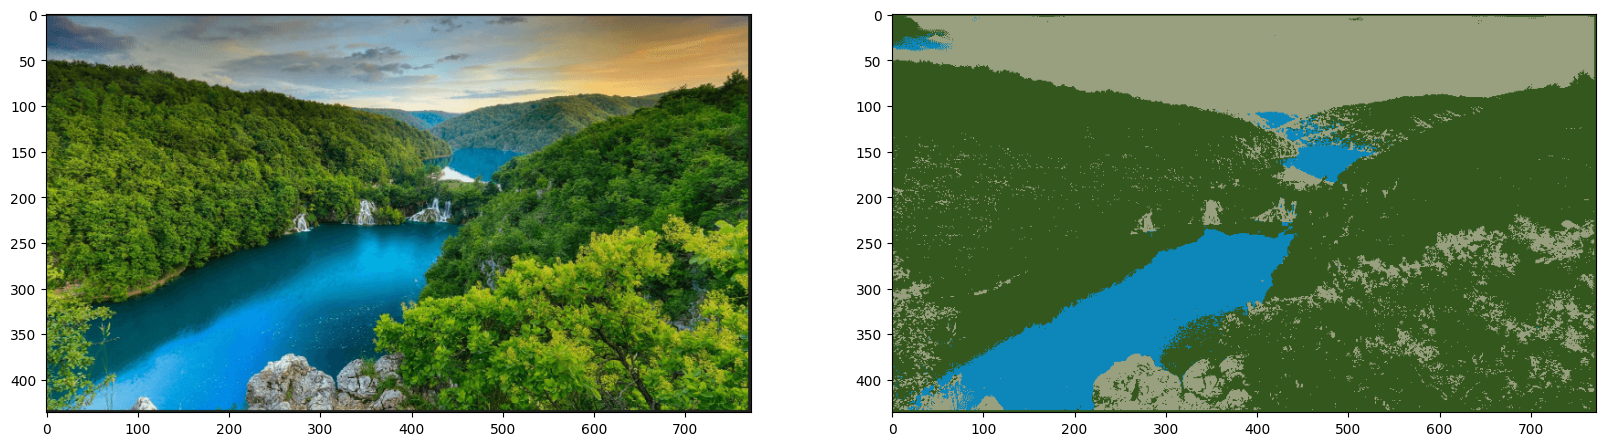

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape array to 2D
pixel_values = img.reshape((-1, 3)).astype(np.float32)  # Convert to float

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centroid points to integers
centers = np.uint8(centers)

# Flatten label array
labels = labels.flatten()

# Convert pixel colors to the color of their respective centroids
segmented_image = centers[labels.flatten()]

# Reshape to the original image shape
segmented_image = segmented_image.reshape(img.shape)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.imshow(img)
plt.subplot(1, 2, 2), plt.imshow(segmented_image)

*Code berikut merupakan lanjutan dari code diatas yang digunakan untuk mengubah warna pada cluster tertentu.*

(<Axes: >, <matplotlib.image.AxesImage at 0x7eeaac9e6320>)

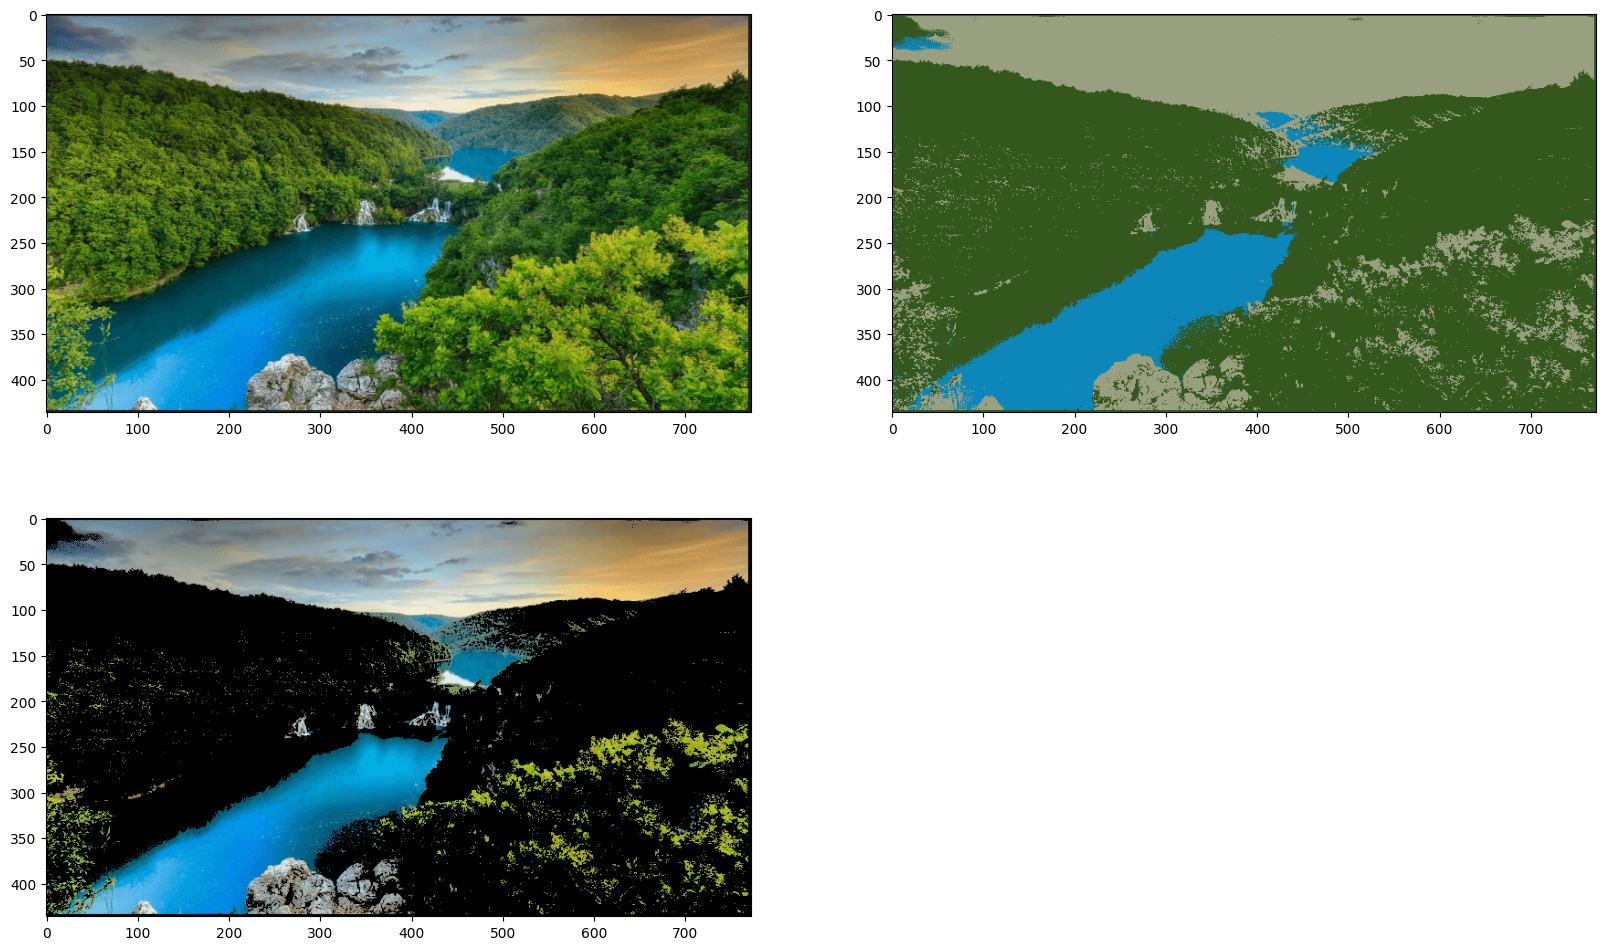

In [ ]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

> # **🔥 TUGAS PRAKTIKUM**

*Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.*

*Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.*

In [ ]:
# Impor modul drive dari pustaka Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount Google Drive ke direktori /content/drive
# Ini akan meminta Anda untuk memberikan kode otorisasi melalui tautan yang diberikan
drive.mount('/content/drive')

Mounted at /content/drive


*Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.*

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

*Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.*

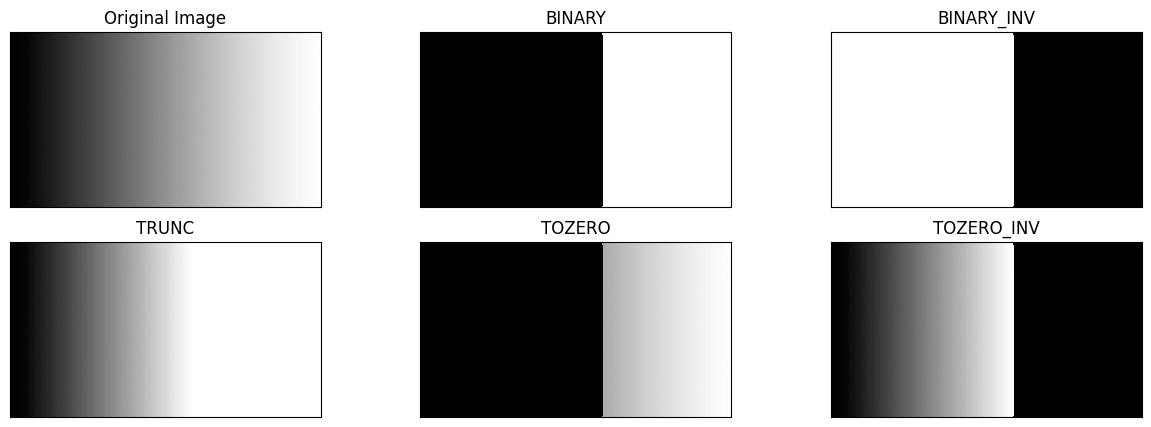

In [ ]:
# Read the image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Define the threshold value
threshold_value = 170

# Apply Binary Thresholding
_, binary_threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Apply Binary Inverse Thresholding
_, binary_inverse_threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Apply Truncate Thresholding
_, truncate_threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)

# Apply To Zero Thresholding
_, to_zero_threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)

# Apply To Zero Inverse Thresholding
_, to_zero_inverse_threshold = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)

# Create a list of titles and images
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary_threshold, binary_inverse_threshold, truncate_threshold, to_zero_threshold, to_zero_inverse_threshold]

# Display the images with titles
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

*Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)*

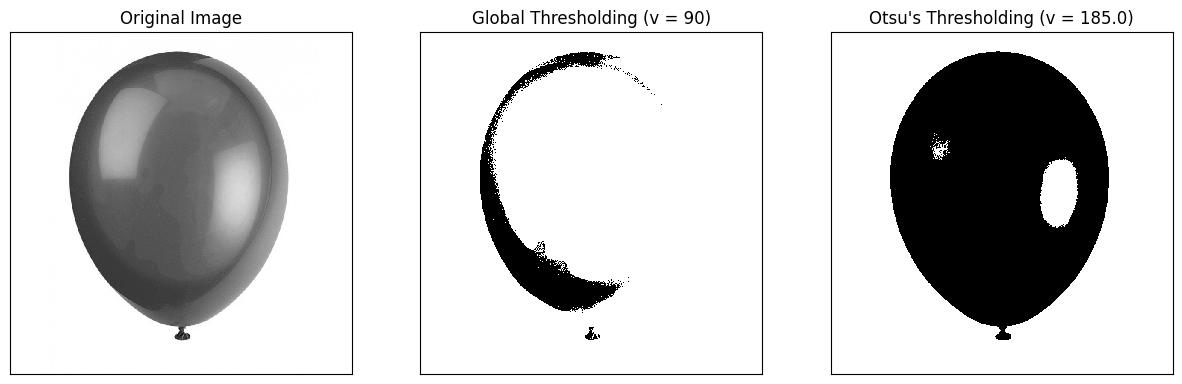

In [ ]:
# Read the image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Global Thresholding (v = 90)
_, global_thresholded = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)

# Calculate Otsu's Threshold
otsu_threshold, _ = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Otsu's Thresholding
_, otsu_thresholded = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Create a list of titles and images
titles = ['Original Image', 'Global Thresholding (v = 90)', "Otsu's Thresholding (v = {})".format(otsu_threshold)]
images = [img, global_thresholded, otsu_thresholded]

# Display the images with titles in a 1x3 grid
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

*Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image*
*saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:*
1. *anda dapat gunakan cv.calcHist untuk menampilkan histogram.*
2. *Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html*
3. *Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).*

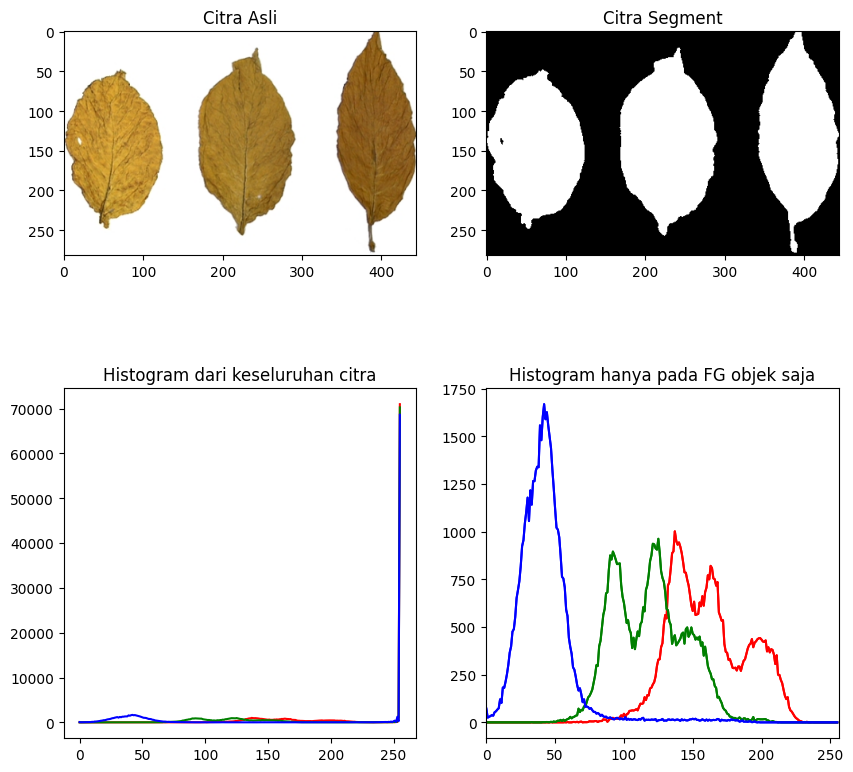

In [ ]:
img_l = cv2.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

*Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


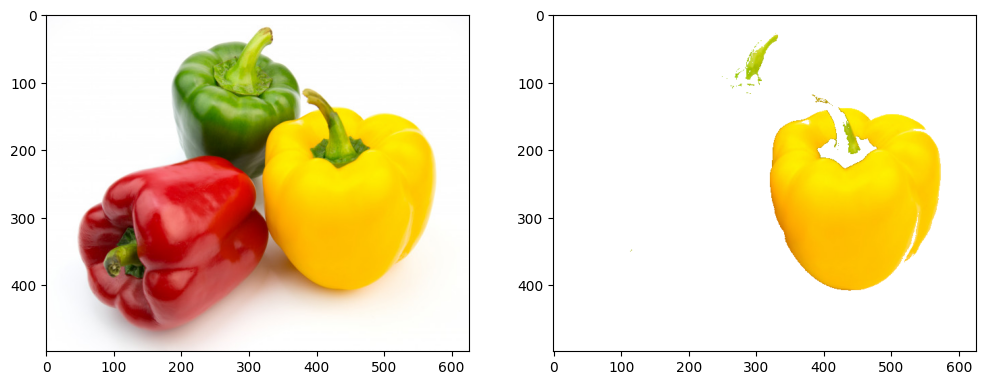

In [ ]:
from sklearn.cluster import KMeans  # Import the KMeans class from scikit-learn

# Load the image
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/peppers.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space for matplotlib

# Convert the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
yellow_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference yellow color
    reference_yellow = np.array([255, 255, 0], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_yellow
    distance = np.linalg.norm(color - reference_yellow)

    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

# Create a mask for the yellow cluster
yellow_mask = (kmeans.labels_ == yellow_cluster)

# Reshape the mask to match the image dimensions
yellow_mask = yellow_mask.reshape(image.shape[0], image.shape[1])

# Create a white background image
white_background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(yellow_mask[..., None], image, white_background)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_rgb)
plt.subplot(122), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()

*Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.*

**Tidak Ada Kendala**

*Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.*

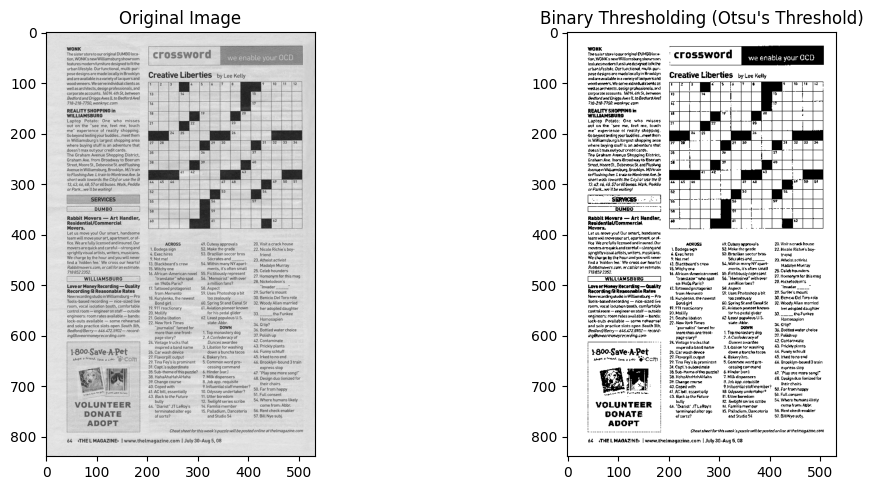

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg', cv2.IMREAD_GRAYSCALE)

# Apply global binary thresholding using Otsu's method
_, binary_threshold = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and thresholded images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Binary Thresholding (Otsu's Threshold)")
plt.imshow(binary_threshold, cmap="gray")

plt.tight_layout()
plt.show()